In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import seaborn
import sklearn
from scipy import stats
import scipy

In [62]:
data=pd.read_csv('D:\REPO_progetto\TesiBiomedica\ERP_SUB',header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,epochs_1-epo.fif,Animali,-0.160141,-0.125426,-0.106573,-0.095095,-0.091029,-0.069748,-0.046371,-0.043094,...,-0.235281,-0.265519,-0.309145,-0.328534,-0.359613,-0.385610,-0.394247,-0.392418,-0.411500,-0.421206
1,epochs_1-epo.fif,Uomini,0.047744,0.026293,0.017957,0.021190,0.011729,-0.003821,-0.025260,-0.037525,...,-0.254461,-0.254013,-0.255682,-0.262205,-0.259558,-0.232320,-0.223093,-0.223084,-0.211410,-0.220349
2,epochs_2-epo.fif,Animali,-0.026694,-0.066588,-0.066975,0.046482,0.118679,0.127005,0.181460,0.129232,...,-0.342489,-0.412722,-0.378892,-0.384511,-0.420109,-0.464766,-0.426704,-0.347167,-0.295815,-0.200058
3,epochs_2-epo.fif,Uomini,0.029168,0.065381,0.057637,-0.062285,-0.150145,-0.148228,-0.124404,-0.093445,...,0.960847,0.974537,1.000000,0.996834,0.999565,0.958478,0.911210,0.897387,0.872463,0.882848
4,epochs_4-epo.fif,Animali,-0.299590,-0.287230,-0.194026,-0.149032,-0.124823,-0.142696,-0.209465,-0.069586,...,-0.952257,-0.945174,-0.887842,-0.914772,-0.822240,-0.697577,-0.599426,-0.639034,-0.660664,-0.675160


In [3]:
#elimino le prime due colonne 
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,261,262,263,264,265,266,267,268,269,270
0,-0.160141,-0.125426,-0.106573,-0.095095,-0.091029,-0.069748,-0.046371,-0.043094,-0.032259,-0.001245,...,-0.235281,-0.265519,-0.309145,-0.328534,-0.359613,-0.385610,-0.394247,-0.392418,-0.411500,-0.421206
1,0.047744,0.026293,0.017957,0.021190,0.011729,-0.003821,-0.025260,-0.037525,-0.037516,-0.045217,...,-0.254461,-0.254013,-0.255682,-0.262205,-0.259558,-0.232320,-0.223093,-0.223084,-0.211410,-0.220349
2,-0.026694,-0.066588,-0.066975,0.046482,0.118679,0.127005,0.181460,0.129232,0.099907,0.144923,...,-0.342489,-0.412722,-0.378892,-0.384511,-0.420109,-0.464766,-0.426704,-0.347167,-0.295815,-0.200058
3,0.029168,0.065381,0.057637,-0.062285,-0.150145,-0.148228,-0.124404,-0.093445,-0.106196,-0.089565,...,0.960847,0.974537,1.000000,0.996834,0.999565,0.958478,0.911210,0.897387,0.872463,0.882848
4,-0.299590,-0.287230,-0.194026,-0.149032,-0.124823,-0.142696,-0.209465,-0.069586,0.080486,0.073727,...,-0.952257,-0.945174,-0.887842,-0.914772,-0.822240,-0.697577,-0.599426,-0.639034,-0.660664,-0.675160


In [4]:
#trasformo i dati in matrice numpy 
tab=np.array(data)

In [5]:
#ottengo gli indici 
Adx=np.arange(0,59,2)
Bdx=np.arange(1,60,2)

In [6]:
#ottengo i vettori animali e uomini
vett_animali=[tab[i]  for  i in Adx]
vett_uomini= [tab[i]  for  i in Bdx]

In [7]:
len(vett_animali)

30

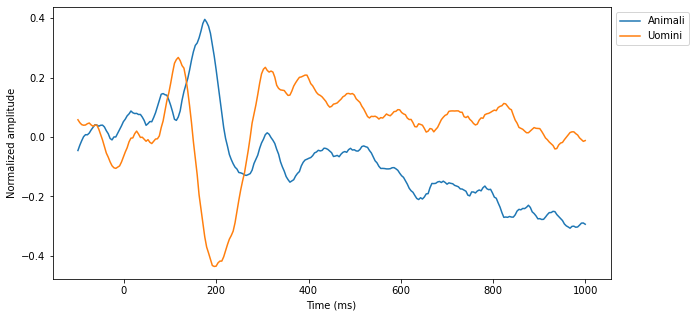

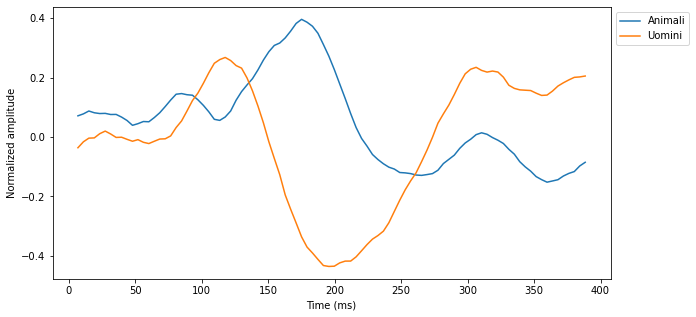

In [8]:
#Calcolo la media 
animali=0
uomini=0

for  i in range(29):
    animali=animali+vett_animali[i]
    uomini=uomini+vett_uomini[i]
    
animali=animali/30
uomini=uomini/30

#plotto i risultati Non croppati 
plt.figure(figsize = (10, 5))
x=np.linspace(-100,1000,269)
plt.plot(x,animali, label='Animali')
plt.plot(x,uomini, label ='Uomini')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized amplitude')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

#Croppo le ERP che voglio studiare 
animali_c=np.delete(animali,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
uomini_c=np.delete(uomini,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])
x_c=np.delete(x,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])

#plotto i risultati croppati 
plt.figure(figsize = (10, 5))
x=np.linspace(-100,1000,269)
plt.plot(x_c,animali_c, label='Animali')
plt.plot(x_c,uomini_c, label ='Uomini')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized amplitude')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')


In [9]:
#Croppo tutti gli ERP
vett_animali_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])for  i in vett_animali]
vett_uomini_c =[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,269,1)),axis=0)])for  i in vett_uomini]

In [10]:
#Eseguo un padding per aumentare i samples a 256

#agli ERP media 
animali_c_p=np.pad(animali_c, pad_width=(81,81), mode='edge')
uomini_c_p=np.pad(uomini_c, pad_width=(81,81), mode='edge')

#a tutti gli ERP 
vett_animali_c_p=[np.pad(i, pad_width=(81,81), mode='edge')for  i in vett_animali_c]
vett_uomini_c_p= [np.pad(i, pad_width=(81,81), mode='edge')for  i in vett_uomini_c]

In [35]:
from kymatio.numpy import Scattering1D

#Scattering Wavelet 
T = animali_c_p.shape[-1]
J = 5
Q = 16
print(T,J,Q)
scattering = Scattering1D(J, T, Q)

256 5 16


Text(0.5, 1.0, 'Uomini-2')

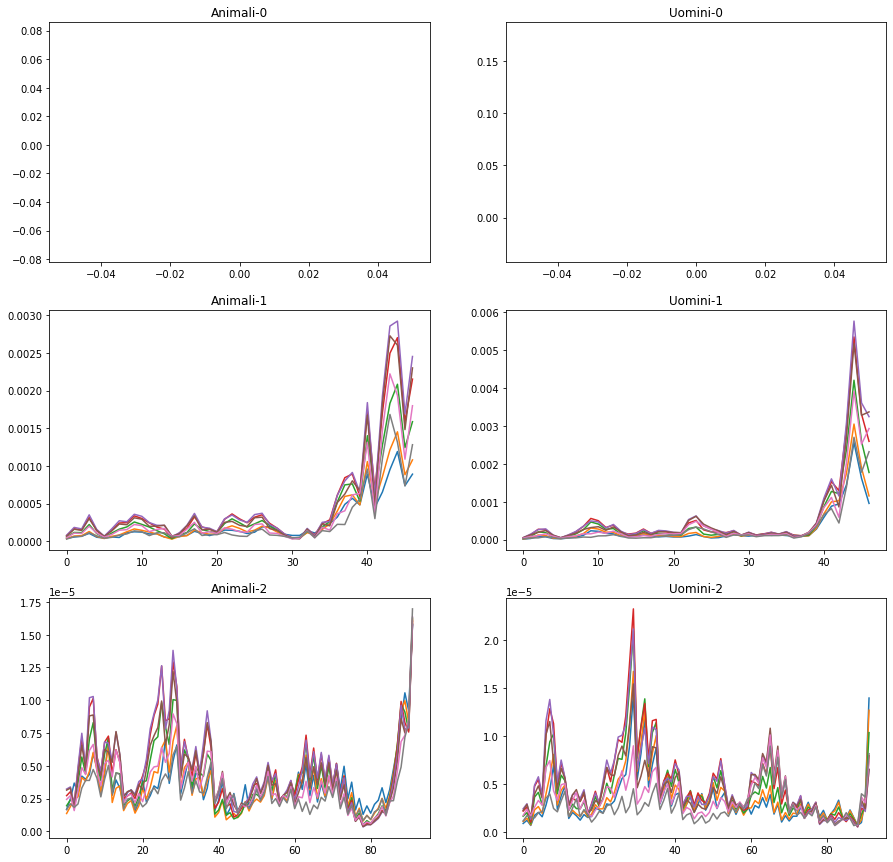

In [36]:
#calcolo coefficienti Scattering --> ERP mediati 

Sc_animali_m = scattering(animali_c_p)
Sc_uomini_m= scattering(uomini_c_p)

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

#PLOTTO I RISULTATI
fig, axs = plt.subplots(3, 2,figsize=(15,15))
##############################################
axs[0, 0].plot(Sc_animali_m[order0])
axs[0, 0].set_title('Animali-0')
##############################################
axs[1, 0].plot(Sc_animali_m[order1])
axs[1, 0].set_title('Animali-1')
##############################################
axs[2, 0].plot(Sc_animali_m[order2])
axs[2, 0].set_title('Animali-2')
##############################################
axs[0, 1].plot(Sc_uomini_m[order0])
axs[0, 1].set_title('Uomini-0')
##############################################
axs[1, 1].plot(Sc_uomini_m[order1])
axs[1, 1].set_title('Uomini-1')
##############################################
axs[2, 1].plot(Sc_uomini_m[order2])
axs[2, 1].set_title('Uomini-2')
##############################################

In [37]:
vett_Sc_animali_m = [scattering(i)for i in vett_animali_c_p]
vett_Sc_uomini_m  = [scattering(i)for  i in vett_uomini_c_p]

In [38]:
#CONTROLLO LE DIMENSIONALITA'

print(vett_Sc_animali_m[0].shape)

print(vett_Sc_animali_m[0][order0].shape)
print(vett_Sc_animali_m[0][order1].shape)
print(vett_Sc_animali_m[0][order2].shape)
print("##################################")
print(Sc_animali_m.shape)
print(Sc_animali_m[order0].shape)
print(Sc_animali_m[order1].shape)
print(Sc_animali_m[order2].shape)

(140, 8)
(1, 8)
(47, 8)
(92, 8)
##################################
(140, 8)
(1, 8)
(47, 8)
(92, 8)


In [39]:
#creo i vettori training e test 
#training
V_A=np.concatenate((Sc_animali_m[order1].mean(axis=1),Sc_animali_m[order2].mean(axis=1)),axis=0)
V_U=np.concatenate((Sc_uomini_m[order1].mean(axis=1),Sc_uomini_m[order2].mean(axis=1)),axis=0)
Vett_V_a=[np.concatenate((i[order1].mean(axis=1),i[order2].mean(axis=1)),axis=0)for  i in vett_Sc_animali_m]
vett_V_u=[np.concatenate((i[order1].mean(axis=1),i[order2].mean(axis=1)),axis=0)for  i in vett_Sc_uomini_m]

In [40]:
from sklearn import svm
X = [V_A,V_U] 
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [41]:
pred_a=clf.predict(Vett_V_a)
pred_u=clf.predict(vett_V_u)

In [42]:
a=0;
u=0;
for i in range(30):
    if (pred_a[i]==0):
        a=a+1;
    if (pred_u[i]==1):
        u=u+1;
acc_a=a/30;
acc_u=u/30;

print("Riconoscimento animali:",acc_a)
print("Riconoscimento uomini:",acc_u)


Riconoscimento animali: 0.3
Riconoscimento uomini: 0.8


In [43]:
#Lo salvo come pandas 
df1 = pd.DataFrame (Vett_V_a)
df2 = pd.DataFrame (vett_V_u)
frames = [df1, df2]
df = pd.concat(frames)

In [44]:
a_type=np.zeros(30, dtype=int)
b_type=np.ones(30, dtype=int)
type=np.concatenate((a_type,b_type))
df.insert(0, "Type", type ,True)
df.head(35)

,Type,0,1,2,3,4,5,6,7,8,...,129,130,131,132,133,134,135,136,137,138
0,0,0.000120,0.000159,0.000301,0.000326,0.000300,0.000165,0.000340,0.000305,0.000443,...,0.000005,0.000007,0.000012,0.000018,0.000027,0.000023,0.000030,0.000024,0.000016,0.000055
1,0,0.000299,0.001111,0.001661,0.001260,0.001316,0.000617,0.000976,0.001371,0.001903,...,0.000008,0.000011,0.000006,0.000004,0.000010,0.000023,0.000031,0.000036,0.000015,0.000028
2,0,0.000367,0.001371,0.001459,0.002498,0.001346,0.000683,0.001013,0.001650,0.002229,...,0.000006,0.000009,0.000005,0.000007,0.000014,0.000020,0.000026,0.000030,0.000037,0.000101
3,0,0.000264,0.000700,0.000852,0.000723,0.000369,0.000245,0.000298,0.000811,0.000932,...,0.000002,0.000002,0.000002,0.000007,0.000008,0.000006,0.000007,0.000019,0.000022,0.000015
4,0,0.000387,0.000968,0.000959,0.000996,0.000859,0.000440,0.001020,0.001030,0.001802,...,0.000006,0.000008,0.000009,0.000013,0.000008,0.000013,0.000038,0.000059,0.000073,0.000073
5,0,0.000275,0.000612,0.000650,0.000652,0.000383,0.000257,0.000311,0.000532,0.001108,...,0.000005,0.000007,0.000004,0.000007,0.000011,0.000009,0.000012,0.000026,0.000049,0.000065
6,0,0.000225,0.000493,0.000473,0.000507,0.000389,0.000232,0.000275,0.000577,0.000540,...,0.000004,0.000006,0.000006,0.000008,0.000009,0.000020,0.000017,0.000007,0.000013,0.000038
7,0,0.000245,0.000378,0.000356,0.000424,0.000387,0.000227,0.000432,0.000660,0.000708,...,0.000004,0.000005,0.000005,0.000008,0.000013,0.000018,0.000016,0.000024,0.000035,0.000046
8,0,0.000200,0.000281,0.000494,0.000439,0.000288,0.000169,0.000694,0.000829,0.000607,...,0.000005,0.000007,0.000010,0.000012,0.000016,0.000015,0.000010,0.000014,0.000027,0.000044
9,0,0.000275,0.000373,0.000410,0.000290,0.000287,0.000345,0.000494,0.000559,0.000648,...,0.000005,0.000008,0.000005,0.000006,0.000015,0.000017,0.000018,0.000020,0.000019,0.000032


In [45]:
label= np.array(df['Type'])

In [46]:
features= df.drop('Type', axis = 1)

In [47]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size = 0.25, random_state = 42)

In [48]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (45, 139)
Training Labels Shape: (45,)
Testing Features Shape: (15, 139)
Testing Labels Shape: (15,)


In [49]:
from sklearn import svm
X = train_features 
y = train_labels
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [50]:
pred=clf.predict(test_features)

In [51]:
a=0;
u=0;
for i in range(len(test_features)):
    if(test_labels[i]==pred[i]):
        a=a+1;

acc=a/len(test_features);
print(acc)

0.5333333333333333


In [64]:
data.to_excel("output.xlsx", header=False)  
